# Pré-processamento da Base de Dados do Titanic
#### Escrito por: José Brito
---

### 1. Carregar os Dados:

- Importando as bibliotecas e carregando o dataset CSV na memória usando pandas.read_csv

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
df = pd.read_csv('../data/titanic.csv')

### 2. Exploração Inicial dos Dados:

- Exibindo as primeiras linhas do dataset para uma visão geral.

In [23]:
# Visualizar as primeiras linhas do dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


- Obtendo as informações sobre a estrutura dos dados, verificando os tipos de dados e valores nulos.

In [24]:
# Informações gerais do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


- Descrevendo estatísticas básicas.

In [25]:
# Estatísticas descritivas de colunas numéricas
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 3. Tratar Valores Duplicados e Valores Faltantes:

- Identificando linhas que estejam duplicadas.

In [26]:
# Verifica se há linhas duplicadas no DataFrame, mantendo todas as duplicatas
if df.duplicated(keep=False).any():
    # Se houver linhas duplicadas, identifica e armazena as duplicatas em 'duplicated_rows'
    duplicated_rows = df[df.duplicated(keep=False)]
    
    # Exibe uma mensagem indicando que há linhas duplicadas
    print("Há linhas duplicadas:")
    
    # Exibe as linhas duplicadas identificadas
    print(duplicated_rows)
else:
    # Se não houver linhas duplicadas, exibe uma mensagem indicando isso
    print("Não há linhas duplicadas.")


Não há linhas duplicadas.


- Identificando colunas com valores nulos.

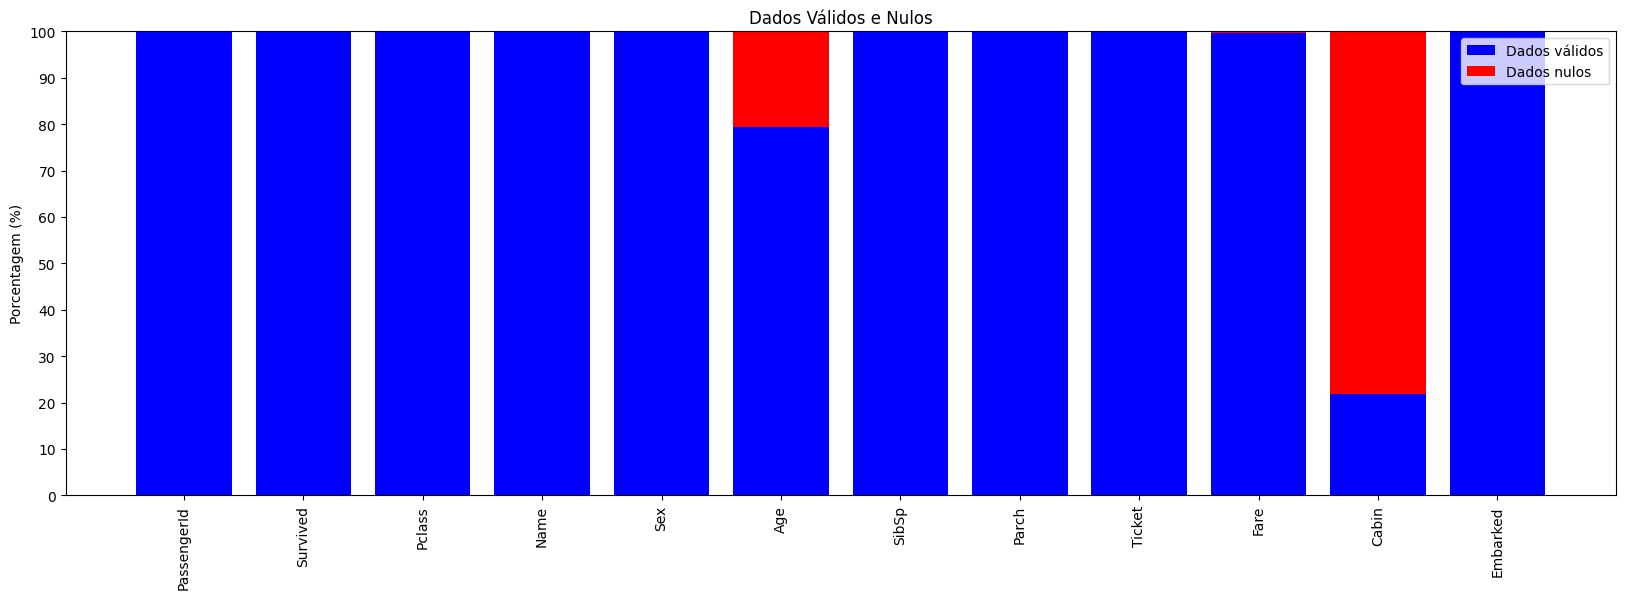

In [27]:
# Calcula a quantidade de valores ausentes em cada coluna do DataFrame
df.isna().sum()

# Calcula o número total de linhas no DataFrame
tam = len(df)

# Lista para armazenar a porcentagem de dados nulos em cada coluna
dados_nulos = []

# Lista para armazenar a porcentagem de dados válidos em cada coluna
dados_validos = []

# Itera sobre cada coluna do DataFrame
for column in df:
    # Calcula a porcentagem de valores nulos em relação ao total de linhas e a adiciona à lista 'dados_nulos'
    dados_nulos.append((df[column].isna().sum() / tam) * 100)
    
    # Calcula a porcentagem de valores válidos em relação ao total de linhas e a adiciona à lista 'dados_validos'
    dados_validos.append(100 - ((df[column].isna().sum() / tam) * 100))

# Cria uma figura para o gráfico com tamanho personalizado
plt.figure(figsize=(20, 8))

# Plota as barras representando os dados válidos para cada coluna, com a cor azul
plt.bar(df.columns.tolist(), dados_validos, color='b', label='Dados válidos')

# Plota as barras representando os dados nulos para cada coluna, com a cor vermelha, empilhando-as sobre as barras de dados válidos
plt.bar(df.columns.tolist(), dados_nulos, bottom=dados_validos, color='r', label='Dados nulos')

# Adiciona um título ao gráfico
plt.title("Dados Válidos e Nulos")

# Adiciona uma legenda ao gráfico
plt.legend()

# Rotaciona os rótulos do eixo x em 90 graus para melhorar a legibilidade
plt.xticks(rotation=90)

# Define os intervalos dos rótulos do eixo y de 0 a 100 com incremento de 10
plt.yticks(range(0, 101, 10))

# Adiciona um rótulo ao eixo y
plt.ylabel('Porcentagem (%)')

# Ajusta a posição dos subplots para evitar sobreposição de rótulos
plt.subplots_adjust(bottom=0.3)

# Exibe o gráfico
plt.show()


In [28]:
# Calcula o número total de linhas no DataFrame
tam = len(df)

# Itera sobre cada coluna do DataFrame
for column in df:
    # Calcula o número de valores nulos na coluna
    nulos = df[column].isna().sum()
    
    # Calcula a porcentagem de dados válidos em relação ao total de linhas e a armazena em 'x'
    x = 1 - nulos / tam   
    
    # Exibe a porcentagem de dados válidos para a coluna atual
    print("Dados válidos de", column, ":", format(x * 100, '.2f'), "%" )

Dados válidos de PassengerId : 100.00 %
Dados válidos de Survived : 100.00 %
Dados válidos de Pclass : 100.00 %
Dados válidos de Name : 100.00 %
Dados válidos de Sex : 100.00 %
Dados válidos de Age : 79.43 %
Dados válidos de SibSp : 100.00 %
Dados válidos de Parch : 100.00 %
Dados válidos de Ticket : 100.00 %
Dados válidos de Fare : 99.76 %
Dados válidos de Cabin : 21.77 %
Dados válidos de Embarked : 100.00 %


#### Preenchendo os dados faltantes.
- Preenche os valores nulos com a moda para colunas com mais de 90% de dados válidos
- Preenche os valores nulos com forward fill para colunas com 70-90% de dados válidos
- Remove as colunas que têm menos de 70% de dados válidos

In [29]:
# Calcula o número total de linhas no DataFrame
tam = len(df)

# Listas para armazenar as colunas que precisam ser removidas ou preenchidas
cols_to_drop = []
cols_to_ffill = []
cols_to_fillna_mode = []

# Itera sobre cada coluna do DataFrame
for column in df.columns:
    # Calcula o número de valores nulos na coluna
    nulos = df[column].isna().sum()
    
    # Calcula a porcentagem de dados válidos em relação ao total de linhas
    x = 1 - nulos / tam

    # Verifica se a porcentagem de dados válidos é menor que 0.7
    if x < 0.7:
        # Se a porcentagem for menor que 0.7, adiciona a coluna à lista de remoção
        cols_to_drop.append(column)
    # Verifica se a porcentagem de dados válidos está entre 0.7 e 0.9
    elif 0.7 <= x < 0.9:
        # Se a porcentagem estiver nesse intervalo, adiciona a coluna à lista de forward fill
        cols_to_ffill.append(column)
    # Caso contrário, ou seja, se a porcentagem for maior ou igual a 0.9
    elif x >= 0.9:
        # Adiciona a coluna à lista de preenchimento com a moda
        cols_to_fillna_mode.append(column)

# Remove as colunas que têm menos de 70% de dados válidos
df.drop(columns=cols_to_drop, inplace=True)

# Preenche os valores nulos com forward fill para colunas com 70-90% de dados válidos
for column in cols_to_ffill:
    df[column] = df[column].ffill()

# Preenche os valores nulos com a moda para colunas com mais de 90% de dados válidos
for column in cols_to_fillna_mode:
    moda = df[column].mode()[0]
    df[column] = df[column].fillna(moda)


# Verifica o resultado

# Calcula o número total de linhas no DataFrame
tam = len(df)

# Itera sobre cada coluna do DataFrame
for column in df:
    # Calcula o número de valores nulos na coluna
    nulos = df[column].isna().sum()
    
    # Calcula a porcentagem de dados válidos em relação ao total de linhas e a armazena em 'x'
    x = 1 - nulos / tam   
    
    # Exibe a porcentagem de dados válidos para a coluna atual
    print("Dados válidos de", column, ":", format(x * 100, '.2f'), "%" )



Dados válidos de PassengerId : 100.00 %
Dados válidos de Survived : 100.00 %
Dados válidos de Pclass : 100.00 %
Dados válidos de Name : 100.00 %
Dados válidos de Sex : 100.00 %
Dados válidos de Age : 100.00 %
Dados válidos de SibSp : 100.00 %
Dados válidos de Parch : 100.00 %
Dados válidos de Ticket : 100.00 %
Dados válidos de Fare : 100.00 %
Dados válidos de Embarked : 100.00 %


### 4. Transformando dados categóricos em numéricos:
- Coluna "Sex"

In [30]:
# Usando a função map para substituir 'male' por 1 e 'female' por 0
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

### 5. Exportando em csv:

In [31]:
df.to_csv('../data/titanic_preprocessed.csv', index=False)